In [1]:

%pylab inline
import illustris_python as il 
from sklearn.neural_network import MLPRegressor 
from sklearn.datasets import make_regression 
from sklearn.model_selection  import train_test_split 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
import  halotools
from halotools_ia.correlation_functions  import ed_3d,ee_3d, ed_3d_one_two_halo_decomp


Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
#%load_ext autoreload
#%autoreload 2
import os
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import sys
sys.path.insert(0, '..')
import tensorflow as tf
 
 
from functools import partial
print(" Available: ",  (tf.config.list_physical_devices('GPU')))
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras.backend as K

Populating the interactive namespace from numpy and matplotlib


2021-11-07 15:18:12.882730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-07 15:18:12.882769: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


 Available:  []


2021-11-07 15:18:16.884137: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-07 15:18:16.884848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-07 15:18:16.885196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-07 15:18:16.885444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2021-11-07 15:18:16.885847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='lambda_6/l2_normalize:0', description="created by layer 'lambda_6'")


Text(0.5, 1.0, 'Centrals only')

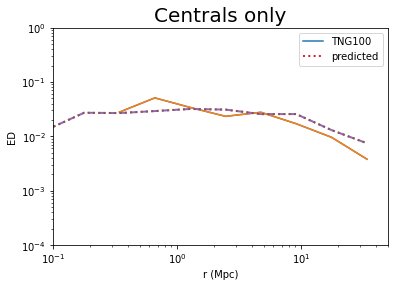

In [6]:
import tensorflow_probability as tfp
# data iformation
input_dim = 9 # number of input features
number_of_classes = 3 # number of classes
 
dense_1_size = 32
dense_2_size = 16
learning_rate = 0.05


# define model architecture
model = Sequential()
model.add(Dense(dense_1_size, activation="relu", input_dim=input_dim))
model.add(Dense(dense_2_size, activation="relu"))

model.add(Dense(3))
#print(model.layers[2].output)
#model.add(tfp.distributions.PowerSpherical(model.layers[2].output, [1,1]))

model.add(Lambda(lambda x: K.l2_normalize(x, axis=-1)))
model.add(Lambda(lambda x: tfp.distributions.TruncatedNormal(x, [0.45,0.45,0.45],[-1,-1,-1], [1,1,1])))
#model.add(Lambda(lambda x: K.l2_normalize(x, axis=-1)))

print(model.layers[3].output)
#model.add(Lambda(lambda x: K.l2_normalize(x, axis=-1)))
# compile the model
opt = Adam(learning_rate=learning_rate)

negative_log_likelihood = lambda y, q: -q.log_prob(y)


model.compile( loss=negative_log_likelihood, optimizer=opt)
#model.compile( loss=, optimizer=opt)



import pickle
from astropy.table import Table, join
from pandas import *

tng = pickle.load(  open('/hildafs/projects/phy200017p/yjagvara/some_data/TNG100-1_99_non-reduced_galaxy_shapes_multi_scale_1024.pkl', "rb" ) )

tng = Table.from_pandas(DataFrame(tng))
tng = tng[tng['dm_mass']>0]
tng = tng[tng['central_bool']>0]
tid_av_x_train, tid_av_x_test,\
tid_av_y_train, tid_av_y_test,\
tid_av_z_train, tid_av_z_test,\
tid_bv_x_train,tid_bv_x_test,\
tid_bv_y_train, tid_bv_y_test,\
tid_bv_z_train, tid_bv_z_test,\
tid_cv_x_train, tid_cv_x_test,\
tid_cv_y_train, tid_cv_y_test,\
tid_cv_z_train, tid_cv_z_test,\
dm_av_x_train,  dm_av_x_test,\
dm_av_y_train,  dm_av_y_test,\
dm_av_z_train, dm_av_z_test,\
gal_pos_x_train, gal_pos_x_test,\
gal_pos_y_train, gal_pos_y_test,\
gal_pos_z_train, gal_pos_z_test = train_test_split( (tng['tid_av_x_0.1_1024']),  (tng['tid_av_y_0.1_1024']),  (tng['tid_av_z_0.1_1024']),
                                        (tng['tid_bv_x_0.1_1024']),  (tng['tid_bv_y_0.1_1024']),  (tng['tid_bv_z_0.1_1024']),
                                       ( tng['tid_cv_x_0.1_1024']),  (tng['tid_cv_y_0.1_1024']),  (tng['tid_cv_z_0.1_1024']),
                                               (tng['dm_av_x']),   (tng['dm_av_y']),   (tng['dm_av_z']),
                                                tng['gal_pos_x'], tng['gal_pos_y'], tng['gal_pos_z'],random_state=0,test_size=0.4)

# subhalo_mass_train=subhalo_mass_train.reshape(-1,1)
# subhalo_mass_test=subhalo_mass_test.reshape(-1,1)
# stellar_mass_train=stellar_mass_train.reshape(-1,1)

X = np.vstack((tid_av_x_train, tid_av_y_train, tid_av_z_train, \
tid_bv_x_train, tid_bv_y_train, tid_bv_z_train, \
tid_cv_x_train, tid_cv_y_train, tid_cv_z_train)).T
Y = np.vstack((dm_av_x_train, dm_av_y_train,   dm_av_z_train)).T

X_test = np.vstack((tid_av_x_test, tid_av_y_test, tid_av_z_test, \
tid_bv_x_test, tid_bv_y_test, tid_bv_z_test, \
tid_cv_x_test, tid_cv_y_test, tid_cv_z_test)).T
Y_test = np.vstack((dm_av_x_test, dm_av_y_test,   dm_av_z_test)).T
batch_size = min(200, np.array(tng).shape[0])
epochs = 500

stratify =   None
# X_train, X_vald, y_train, y_vald = train_test_split(
#     X, y, test_size=1.0, shuffle=True, stratify=stratify
# )
# set callbacks
es = EarlyStopping(monitor="val_loss", mode="min", verbose=0, patience=10)
mc = ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    mode="min",
    verbose=0,
    save_best_only=True,
)

model.fit(
    X,
    Y,
    validation_data=(X_test, Y_test),
    batch_size=batch_size,
    epochs=500,
    verbose=False,
    callbacks=[es, mc],
)
tng = pickle.load(  open('/hildafs/projects/phy200017p/yjagvara/some_data/TNG100-1_99_non-reduced_galaxy_shapes_multi_scale_1024.pkl', "rb" ) )

tng = Table.from_pandas(DataFrame(tng))
tng = tng[tng['dm_mass']>0]

Y_pred = model(np.vstack( ((tng['tid_av_x_0.1_1024']),  (tng['tid_av_y_0.1_1024']),  (tng['tid_av_z_0.1_1024']),
                                        (tng['tid_bv_x_0.1_1024']),  (tng['tid_bv_y_0.1_1024']),  (tng['tid_bv_z_0.1_1024']),
                                       ( tng['tid_cv_x_0.1_1024']),  (tng['tid_cv_y_0.1_1024']),  (tng['tid_cv_z_0.1_1024']))).T).sample().numpy() 
dm_av_x_pred = Y_pred[:,0]
dm_av_y_pred = Y_pred[:,1]
dm_av_z_pred = Y_pred[:,2]
pos_train = np.array([gal_pos_x_train, gal_pos_y_train, gal_pos_z_train]).T

pos_test = np.array([tng['gal_pos_x'], tng['gal_pos_y'], tng['gal_pos_z']]).T
 
or_train = np.array([dm_av_x_train, dm_av_y_train, dm_av_z_train]).T

or_pred = np.array([dm_av_x_pred, dm_av_y_pred, dm_av_z_pred]).T 



rbins = np.logspace(-1.5,1.35,11)
ed1h,ed2h = ed_3d_one_two_halo_decomp(pos_train , or_train , np.ones(len(or_train)),  pos_train , np.ones(len(or_train)) , rbins, period=75, num_threads=28)
ed1h2,ed2h2 = ed_3d_one_two_halo_decomp(pos_test , or_pred , np.arange(len(Y_pred)),  pos_test , np.arange(len(Y_pred)), rbins, period=75, num_threads=28)
plt.figure()
plot(rbins[1:] + rbins[:-1],  (ed1h+ed2h),label='TNG100')
plot(rbins[1:] + rbins[:-1],  (ed1h))
plot(rbins[1:] + rbins[:-1],  (ed2h))

plot(rbins[1:] + rbins[:-1],   abs(ed1h2),':',label='predicted',lw=2)
plot(rbins[1:] + rbins[:-1],   abs(ed2h2),'--',lw=2)
plot(rbins[1:] + rbins[:-1],   abs(ed1h2+ed2h2),':',lw=2)
ylim(0.0001, 1.0)
legend()
title('step:' +str(step))
ylabel('ED')
xlabel('r (Mpc)')
xscale('log')
yscale('log')
xlim(10**-1,50)
title('Centrals only', fontsize=20)


In [9]:

tng['mlp_av_x'] = Y_pred[:,0].astype(np.float64) 
tng['mlp_av_y'] = Y_pred[:,1].astype(np.float64) 
tng['mlp_av_z'] = Y_pred[:,2].astype(np.float64) 
pickle.dump( tng ,open( '/hildafs/projects/phy200017p/yjagvara/some_data/TNG100-1_99_non-reduced_galaxy_shapes_multi_scale_1024_MLP_only_cent.pkl' , "wb" ) )


In [9]:
x_smpl = linspace((-1,-1,-1), (1,1,1),1000)


In [10]:
print(model(X_test).log_prob([1,1,1 ]))






tf.Tensor([ -9.163994  -8.854275 -10.83943  ... -11.060701  -9.866486 -11.526154], shape=(13865,), dtype=float32)


In [11]:
#x_smpl = linspace((-1,-1,-1,-1,-1,-1,-1,-1,-1), (1,1,1,1,1,1,1,1,1),100)


# We evaluate the log probability of the model at different points, to sample the pdf of
# each example



In [67]:
 
Y_pred.shape


(27730, 3)

Text(0.5, 0, 'Actual (Normalized)')

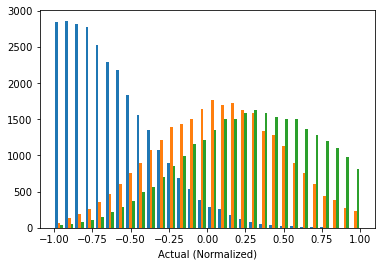

In [68]:
h=hist(Y_pred,bins=30)
xlabel('Actual (Normalized)')

In [69]:
Y_test.shape

(11092, 3)

Text(0.5, 0, 'Actual (Normalized)')

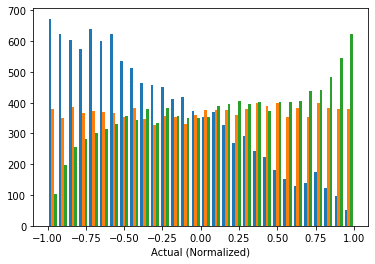

In [70]:
h=hist(Y_test,bins=30)
xlabel('Actual (Normalized)')

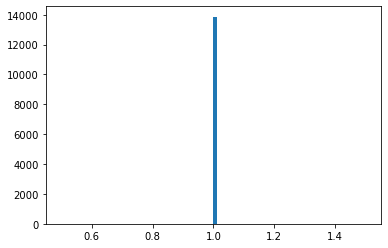

In [510]:
norms = np.linalg.norm(Y_test,axis=1).astype('float32')
h=hist(norms,bins=100 )


# dm_vecs = np.array([(tng['dm_av_x']),   (tng['dm_av_y']),   (tng['dm_av_z'])])
# zero_dm_vecs = dm_vecs.T[np.linalg.norm(dm_vecs,axis=0)<1]
# #hist(np.linalg.norm(zero_dm_vecs,axis=1).astype('float32'))




In [511]:
print(np.linalg.norm(Y,axis=-1) )


[1. 1. 1. ... 1. 1. 1.]


In [512]:

dm_av_x_pred = Y_pred[:,0]
dm_av_y_pred = Y_pred[:,1]
dm_av_z_pred = Y_pred[:,2]
pos_train = np.array([gal_pos_x_train, gal_pos_y_train, gal_pos_z_train]).T
pos_test = np.array([gal_pos_x_test, gal_pos_y_test, gal_pos_z_test]).T

or_train = np.array([dm_av_x_train, dm_av_y_train, dm_av_z_train]).T 
or_pred = np.array([dm_av_x_pred, dm_av_y_pred, dm_av_z_pred]).T 
rbins = np.logspace(-1.5,1.35,11)
ed1h,ed2h = ed_3d_one_two_halo_decomp(pos_train , or_train , np.ones(len(or_train)),  pos_train , np.ones(len(or_train)) , rbins, period=75, num_threads=28)
ed1h2,ed2h2 = ed_3d_one_two_halo_decomp(pos_test , or_pred , np.ones(len(or_pred)),  pos_test , np.ones(len(or_pred)), rbins, period=75, num_threads=28)
plt.figure()
plot(rbins[1:] + rbins[:-1],  (ed1h+ed2h),label='TNG100')
plot(rbins[1:] + rbins[:-1],  (ed1h))
plot(rbins[1:] + rbins[:-1],  (ed2h))

plot(rbins[1:] + rbins[:-1],   abs(ed1h2),':',label='predicted',lw=2)
plot(rbins[1:] + rbins[:-1],   abs(ed2h2),'--',lw=2)
plot(rbins[1:] + rbins[:-1],   abs(ed1h2+ed2h2),':',lw=2)
ylim(0.0001, 0.5)
legend()
title('step:' +str(step))
ylabel('ED')
xlabel('r (Mpc)')
xscale('log')
yscale('log')
xlim(0.1,50)
title('Centrals only', fontsize=20)

(array([2387., 2279., 2112., 1729., 1510., 1297.,  979.,  696.,  537.,
         339.]),
 array([-9.99976427e-01, -8.00073378e-01, -6.00170330e-01, -4.00267282e-01,
        -2.00364233e-01, -4.61184904e-04,  1.99441863e-01,  3.99344912e-01,
         5.99247960e-01,  7.99151009e-01,  9.99054057e-01]),
 <BarContainer object of 10 artists>)

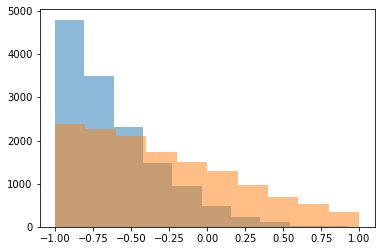

In [513]:
hist( (dm_av_x_pred),alpha=0.5)
hist( (dm_av_x_test),alpha=0.5)




(array([1380., 1368., 1376., 1282., 1336., 1429., 1424., 1429., 1416.,
        1425.]),
 array([-9.99855357e-01, -7.99888557e-01, -5.99921757e-01, -3.99954957e-01,
        -1.99988157e-01, -2.13569335e-05,  1.99945443e-01,  3.99912243e-01,
         5.99879043e-01,  7.99845843e-01,  9.99812643e-01]),
 <BarContainer object of 10 artists>)

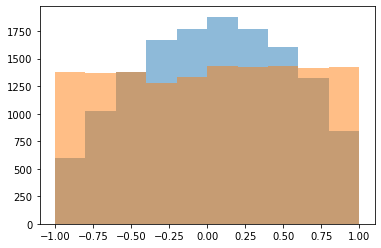

In [514]:
hist( (dm_av_y_pred),alpha=0.5)
hist( (dm_av_y_test),alpha=0.5)

(array([ 725., 1132., 1269., 1331., 1353., 1417., 1476., 1483., 1627.,
        2052.]),
 array([-0.99643123, -0.79679343, -0.59715563, -0.39751783, -0.19788004,
         0.00175776,  0.20139556,  0.40103336,  0.60067116,  0.80030896,
         0.99994676]),
 <BarContainer object of 10 artists>)

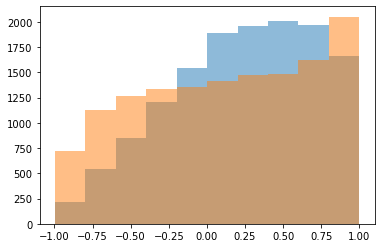

In [515]:
hist(dm_av_z_pred,alpha=0.5)
hist(dm_av_z_test,alpha=0.5)

Text(0.5, 1.0, 'Centrals only')

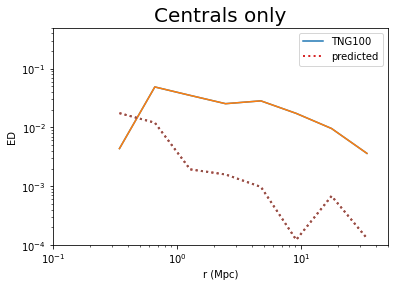

In [486]:
pos_train = np.array([gal_pos_x_train, gal_pos_y_train, gal_pos_z_train]).T
pos_test = np.array([gal_pos_x_test, gal_pos_y_test, gal_pos_z_test]).T

or_train = np.array([dm_av_x_train, dm_av_y_train, dm_av_z_train]).T 
or_pred = np.array([dm_av_x_pred, dm_av_y_pred, dm_av_z_pred]).T 
rbins = np.logspace(-1.5,1.5,16)
ed1h,ed2h = ed_3d_one_two_halo_decomp(pos_train , or_train , np.ones(len(or_train)),  pos_train , np.ones(len(or_train)) , rbins, period=None, num_threads=28)
ed1h2,ed2h2 = ed_3d_one_two_halo_decomp(pos_test , or_pred , np.ones(len(or_pred)),  pos_test , np.ones(len(or_pred)), rbins, period=None, num_threads=28)


Text(0.5, 1.0, 'Central+Sat.')

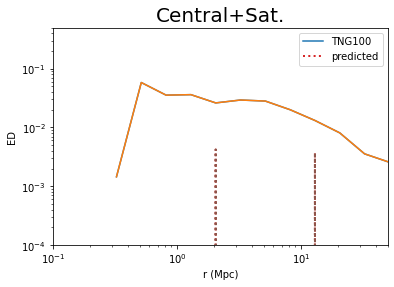

In [435]:
plt.figure()
plot(rbins[1:] + rbins[:-1],  (ed1h+ed2h),label='TNG100')
plot(rbins[1:] + rbins[:-1],  (ed1h))
plot(rbins[1:] + rbins[:-1],  (ed2h))

plot(rbins[1:] + rbins[:-1],  (ed1h2),':',label='predicted',lw=2)
plot(rbins[1:] + rbins[:-1],  (ed2h2),'--',lw=2)
plot(rbins[1:] + rbins[:-1],  (ed1h2+ed2h2),':',lw=2)
ylim(0.0001, 0.5)
legend()
title('step:' +str(step))
ylabel('ED')
xlabel('r (Mpc)')
xscale('log')
yscale('log')
xlim(0.1,50)
title('Central+Sat.', fontsize=20)